In [6]:
import numpy as np
import numba
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import time

In [7]:
def random_k(rnd):
    return np.power(1 - rnd, -2/3)

In [8]:
num_samples = 1000
observations_per_sample = np.power(10, np.arange(1, 6+1))

In [9]:
samples = [None] * observations_per_sample.shape[0]

for n in range(len(samples)):
    t0 = time.time()
    samples[n] = np.round(random_k(np.random.random(size=(num_samples, observations_per_sample[n]))))
    t1 = time.time()
    print(n, t1-t0)

0 0.003771066665649414
1 0.0056819915771484375
2 0.04975724220275879
3 0.40947890281677246
4 4.405920028686523
5 140.43943905830383


In [12]:
samples_cp = [s.copy() for s in samples]

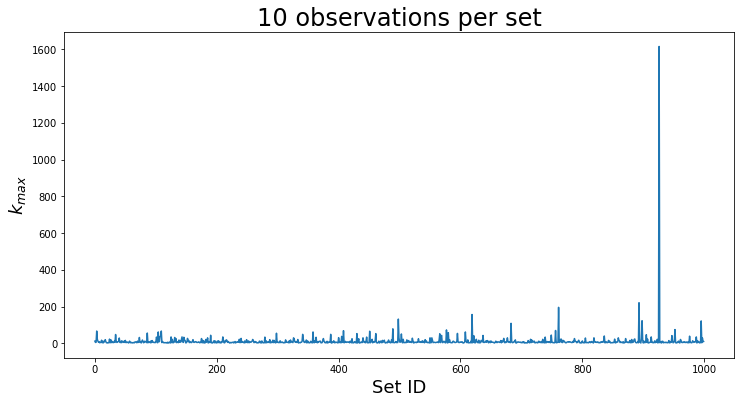

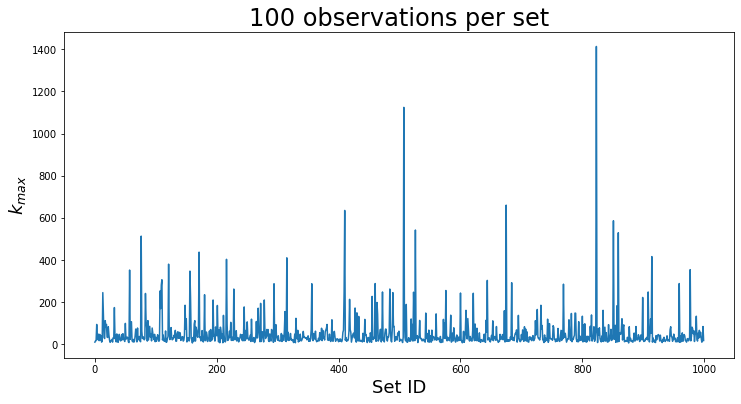

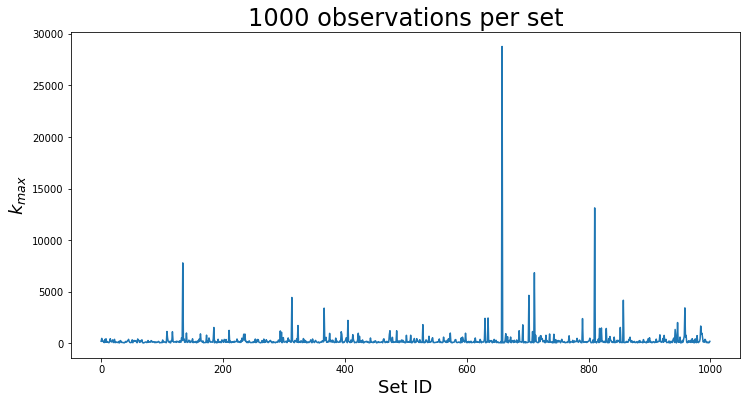

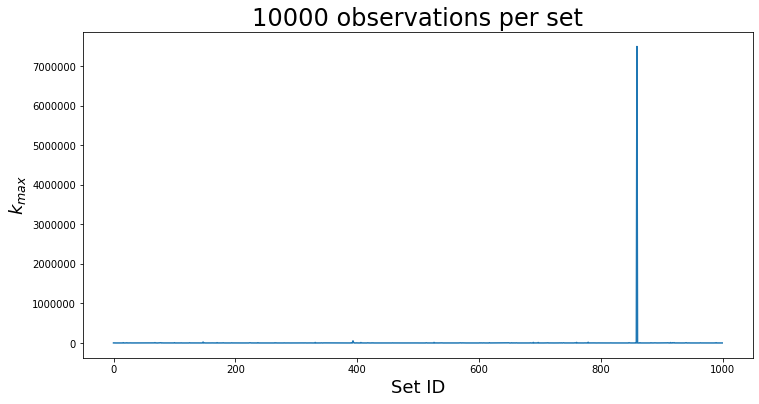

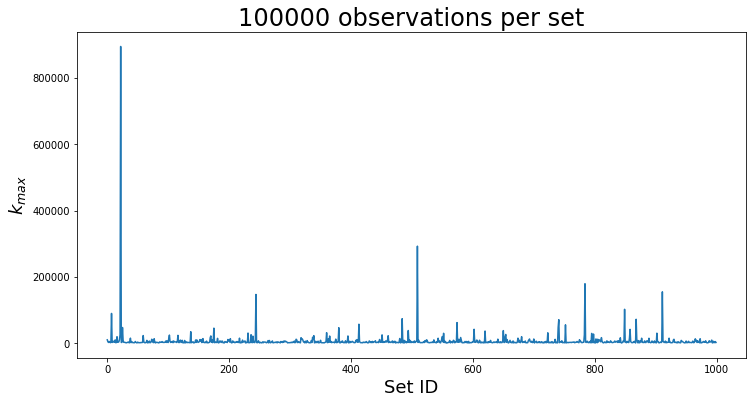

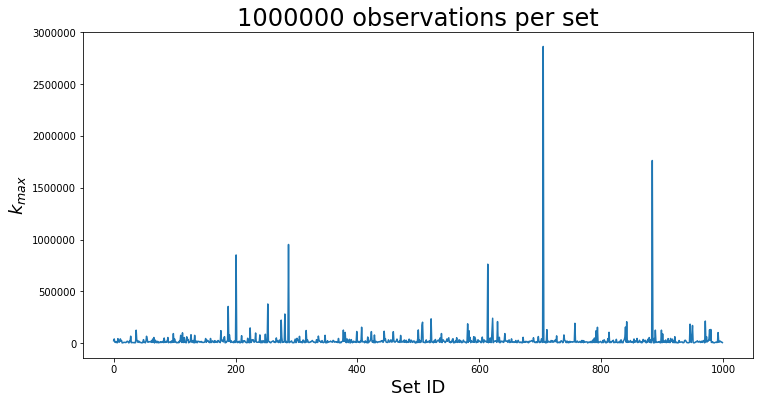

In [25]:
for n in range(len(samples)):
    sample_maxes = np.max(samples[n], axis=1)
    fig, ax = plt.subplots(1, figsize=(12,6))
    ax.plot(np.arange(num_samples), sample_maxes)
    ax.set_title("%d observations per set"%int(observations_per_sample[n]), fontsize=24)
    ax.set_xlabel("Set ID", fontsize=18)
    ax.set_ylabel(r"$k_{max}$", fontsize=18)
    plt.savefig("figs/part_8/%d.pdf"%(int(observations_per_sample[n])), bbox_inches="tight", pad_inches=0)
    plt.show()
    

[     10     100    1000   10000  100000 1000000] [1.2183000e+01 5.3016000e+01 2.9073800e+02 8.6421190e+03 6.7574780e+03
 3.0710442e+04]


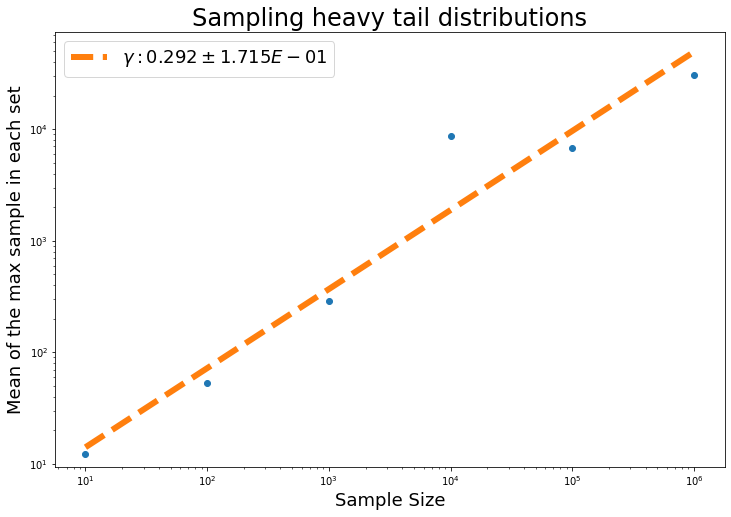

In [41]:
X = observations_per_sample
Y = np.zeros(shape=X.shape[0])
for n in range(len(samples)):
    Y[n] = np.mean(np.max(samples[n], axis=1))
print(X,Y)
fig, ax = plt.subplots(1, figsize=(12,8))

log10_X = np.log10(X)
log10_Y = np.log10(Y)
slope, intercept, r_val, p_val, std_err = stats.linregress(log10_X, log10_Y)
predict = lambda n: intercept + slope * n 
predictions = np.power(10, predict(log10_X))
ax.plot(X, predictions, c="C1", linewidth=6, linestyle="dashed", label=r"$\gamma: %.3f \pm %.3E$"%((-slope + 1), std_err * 1.96))

ax.scatter(X, Y)
ax.legend(fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Mean of the max sample in each set", fontsize=18)
plt.xlabel("Sample Size", fontsize=18)
plt.title("Sampling heavy tail distributions", fontsize=24)
plt.savefig("figs/part_8/regression.pdf", bbox_inches="tight", pad_inches=0)
